In [1]:
from games.tic_tac_toe import TicTacToe
from networks.tic_tac_toe_net import create_network

from lib.model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [4]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/trained/network_tic_tac_toe.h5")

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 3, 3, 1)]    0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 3, 3, 1024)   2048        ['input_2[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 1024)   0           ['conv2d_1[0][0]']               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 3, 3, 1024)   1049600     ['re_lu[0][0]']                  
                                                                                  

In [3]:
state = game.get_init_state()
model.predict(game.get_canonical_form(state))

2021-12-05 21:15:09.452911: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([0.06007506, 0.05599592, 0.07058781, 0.05985684, 0.06820609,
        0.05714523, 0.07003339, 0.05808771, 0.500012  ], dtype=float32),
 0.5922889)

In [ ]:
state = game.get_init_state()
game.play_vs_bot(model, Model(create_network(game.shape, game.nb_actions)), state, 1)

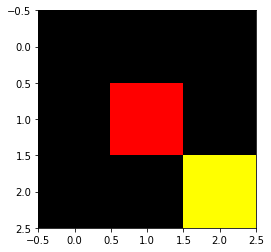

Model prediction: (array([0.13663317, 0.08279285, 0.15435696, 0.09275427, 0.00062893,
       0.13189277, 0.14320521, 0.09903415, 0.15870166], dtype=float32), -0.7925932)
Root value: 0.0


ValueError: invalid literal for int() with base 10: ''

In [4]:
state = game.get_init_state()
state = game.get_new_state(state, 4)
#state = game.get_new_state(state, 3)
game.play_vs(model, state, 50)